## Description:

* There are 922 e-mails divided equally between spam and non-spam(ham)
* The first line of every email contains the subject and the third line contains the body as shown:

![title](sample_email.png)

### Task :- Perform text analysis only on the body to detect spam mails

In [253]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sqlite3
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import re
from nltk.corpus import stopwords
import nltk 

import glob
import errno

from sklearn.manifold import  TSNE
from sklearn.utils import shuffle 

In [115]:
#function to read all emails one by one
def ret(loc):
    path =loc 
    files = glob.glob(path)
    lst=[] #list to store spam/ham emails
    for fname in files: #reading file one by one
        try:
            with open(fname,'r') as f: #opening file in read mode
                lines = f.readlines()  
                str = '' 
                for i in range(2,len(lines)): #starting from 2nd index to ignore subject.
                    str += lines[i].rstrip('\n') #concatenation
                lst.append(str) #adding string to list
                f.close()
        except IOError as exc:
            if exc.errno != errno.EISDIR:
                raise
    return lst

In [178]:
#function calling - give your own directory where you store the emails
spam=ret('C:\\Users\\**\\Desktop\\jupyter\\Spam Dataset 3\\Spam emails\\*.txt')
ham=ret('C:\\Users\\**\\Desktop\\jupyter\\Spam Dataset 3\\Ham emails\\*.txt')
print(len(spam))
print(len(ham))

481
481


In [179]:
#creating a dataframe of all mails with label
spam=pd.DataFrame(spam,columns=['mail'])
ham=pd.DataFrame(ham,columns=['mail'])
spam['type']=1
ham['type']=0
data=pd.concat([spam,ham],axis=0,ignore_index=True)
data

,mail,type
0,* * * * * * * * * * * * * * * display box cred...,1
1,"dear nlpeople , ' m sure ' ll agree auto insur...",1
2,"want best hunt camp vacation life , felton 's ...",1
3,57 million email addresses $ 99 want money ? p...,1
4,attention ! warn ! adult ! warn ! adult ! unde...,1
5,attention ! warn ! adult ! warn ! adult ! unde...,1
6,subject : re : are debt ? help . qualify finge...,1
7,= = = = = = = = = = = = = = = = = = = = = = = ...,1
8,57 million email addresses $ 99 want money ? p...,1
9,$ 3500 per week home computer ! put free softw...,1


In [181]:
data['type'].value_counts()

1    481
0    481
Name: type, dtype: int64

In [184]:
#saving the file
conn=sqlite3.connect('spam.sqlite')
c=conn.cursor()
spam.to_sql('Data',conn,if_exists='replace',index=False)
conn.close

<function Connection.close>

## Preprocessing

In [187]:
#removing the duplicates
data=data.drop_duplicates(subset=['mail'])
data.shape
#25 duplicates mail are there

(937, 2)

In [193]:
#stopwords
stop = set(stopwords.words('english'))

In [195]:
lst = ["wouldn't",'won', 'nor', 'not', 'against',"doesn't","don't"]
for word in lst:
    stop.remove(word)
print(stop)

{'you', 'our', 'hadn', 'been', 'in', 'where', "needn't", 'a', 'then', 'once', 'again', 'y', 'doing', "isn't", "you've", 'more', 'for', 'into', 'too', 'being', 'from', "hadn't", 'ours', 'this', 'which', 'her', 'his', 'its', 'll', 'while', 'until', 'was', 'between', "you'll", 'so', 'should', 'their', 'above', "you're", 'the', 'didn', 'shouldn', 'about', 'he', 'had', 'having', 'both', 'when', 'if', 'doesn', 'isn', 'up', "shouldn't", 'weren', 'down', "she's", 'during', 'because', 'further', 'under', 'than', "mightn't", 'that', 'myself', 'shan', "that'll", 'needn', "won't", "shan't", 'haven', 'do', 'over', 'why', 'will', 'of', 'ma', 'any', 'as', 'through', 'very', 'only', "should've", "didn't", 'same', 'we', 'each', 'does', 'himself', "hasn't", 'few', 'no', 's', 'hasn', 'yours', 'some', 'd', 've', 'i', 'those', 'all', 'mightn', 'here', "haven't", 'other', 'before', 'me', 'o', 'on', 'theirs', 'out', 'by', 'most', 'yourselves', "wasn't", 'and', "you'd", 'them', 'ourselves', 'herself', 'what',

In [196]:
#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')

In [197]:
#function to remove html tags
def cleanhtml(sent):
    cleanr=re.compile('<.*?>')
    cleantext=re.sub(cleanr,' ',sent)
    return cleantext

In [209]:
#function to remove punctuation
def cleanpunc(sent):
    cleaned=re.sub(r'[?|@|!|^|%|\'|"|#|$|:|*|+|-|=|\-|&|_]',r'',sent)
    cleaned=re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [214]:
#function to implement preprocessing
def pre(series):
    '''The function takes a Pandas Series object containing text in all the cells
       And performs following Preprocessing steps on each cell:
       1. Clean text from html tags
       2. Clean text from punctuations and special characters
       3. Retain only non-numeric Latin characters with lenght > 2
       4. Remove stopwords from the sentence
       5. Apply stemming to all the words in the sentence
       
       Return values:
       1. final_string - List of cleaned sentences
       2. list_of_sent - List of lists which can be used as input to the W2V model'''
    
    i = 0
    str1=" "
    final_string = []    # This list will contain cleaned sentences
    list_of_sent = []    # This is a list of lists used as input to the W2V model at a later stage
    
    ## Creating below lists for future use
    all_positive_words=[] # store words from spam
    all_negative_words=[] # store words from ham
    
    
    for sent in series.values:
        
        filtered_sent = []
        sent = cleanhtml(sent)    # Clean the HTML tags
        sent = cleanpunc(sent)    # Clean the punctuations and special characters
        # Sentences are cleaned and words are handled individually
        for cleaned_words in sent.split():
            # Only consider non-numeric words with length at least 3
            if((cleaned_words.isalpha()) and (len(cleaned_words) > 2)):
                # Only consider words which are not stopwords and convert them to lowet case
                if(cleaned_words.lower() not in stop):
                    # Apply snowball stemmer and add them to the filtered_sent list
                    s = (sno.stem(cleaned_words.lower()))#.encode('utf-8')
                    filtered_sent.append(s)    # This contains all the cleaned words for a sentence
                    if (final['type'].values)[i] == 1:
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['type'].values)[i] == 0:
                        all_negative_words.append(s) #list of all words used to describe negative reviews
        # Below list is a list of lists used as input to W2V model later
        list_of_sent.append(filtered_sent)
        # Join back all the words belonging to the same sentence
        str1 = " ".join(filtered_sent)
        # Finally add the cleaned sentence in the below list
        final_string.append(str1)
        i += 1
    return final_string, list_of_sent

In [215]:
final_string,list_of_sent=pre(data['mail']) #function calling

In [216]:
data['cleaned_mail_stem']=final_string #adding another column
print(data.shape)
data.head()

(937, 3)


,mail,type,cleaned_mail_stem
0,* * * * * * * * * * * * * * * display box cred...,1,display box credit application need place smal...
1,"dear nlpeople , ' m sure ' ll agree auto insur...",1,dear nlpeople sure agree auto insurance cost m...
2,"want best hunt camp vacation life , felton 's ...",1,want best hunt camp vacation life felton hunt ...
3,57 million email addresses $ 99 want money ? p...,1,million email addresses want money put touch m...
4,attention ! warn ! adult ! warn ! adult ! unde...,1,attention warn adult warn adult age interest s...


In [218]:
#save the file
conn=sqlite3.connect('spam.sqlite')
c=conn.cursor()
spam.to_sql('Data',conn,if_exists='replace',index=False)
conn.close

<function Connection.close>

In [222]:
with open('list_of_sent_for_input_to_w2v.pkl','wb') as pickle_file:
    pickle.dump(list_of_sent,pickle_file)

**BOW TSNE**

In [272]:
#shuffle data
data=shuffle(data,random_state=123)

In [273]:
#initializing the vectorizer
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(data['cleaned_mail_stem'].values)
x=bow[:,:].toarray()

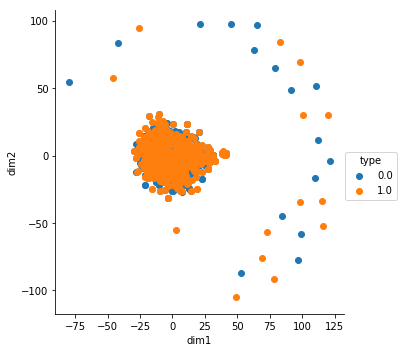

In [274]:
tsne=TSNE(n_components=2,perplexity=30).fit_transform(x)
df=pd.DataFrame(tsne,columns=('dim1','dim2'))
df=pd.concat([df,data['type'].iloc[:]],axis=1)
sns.FacetGrid(df,hue='type',size=5).map(plt.scatter,'dim1','dim2').add_legend()

* the cluster is not linearly seprable in 2D.

** TFIDF TSNE**

In [275]:
#initializing the vectorizer
tfidf_vec=TfidfVectorizer()
tfidf=tfidf_vec.fit_transform(data['cleaned_mail_stem'].values)
y=tfidf[:,:].toarray()

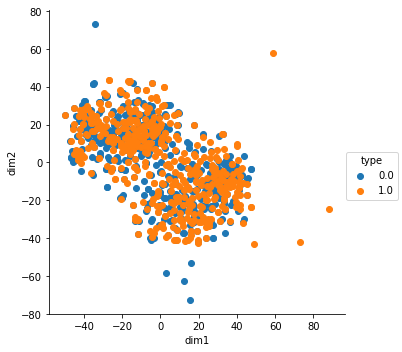

In [276]:
tsne=TSNE(n_components=2,perplexity=30).fit_transform(y)
df=pd.DataFrame(tsne,columns=('dim1','dim2'))
df=pd.concat([df,data['type'].iloc[:3500]],axis=1)
sns.FacetGrid(df,hue='type',size=5).map(plt.scatter,'dim1','dim2').add_legend()

* Here also the cluster is not linearly seprable in 2D.

**1) Binary BOW - bernoulliNB**

In [255]:
bow_vect=CountVectorizer(binary=True)
bow=bow_vect.fit_transform(data['cleaned_mail_stem'].values)
x=bow  
y=data['type'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)#train-test split 

the optimal value of alpha is 0.030


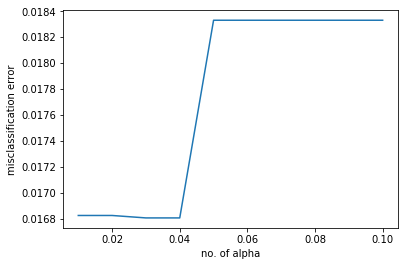

In [258]:
#code to find value of k
alpha=np.linspace(0.01,0.1,10)
cv_scores=[]

for a in alpha:
    clf=BernoulliNB(alpha=a)
    score=cross_val_score(clf,x_train,y_train,cv=8,scoring='accuracy') #Hyper paramter -CV
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('the optimal value of alpha is %0.3f' % optimal_alpha)
plt.plot(alpha,MSE)
plt.xlabel('no. of alpha')
plt.ylabel('misclassification error')
plt.show()

In [259]:
#fitting the model on optimal value of k
clf=BernoulliNB(alpha=optimal_alpha)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test) #generating prediction
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
cof=confusion_matrix(y_test,y_pred).T
cof

99.6453900709


array([[145,   1],
       [  0, 136]], dtype=int64)

In [260]:
#Evalution matrices
tp=int(cof[1:,1:])
fp=int(cof[1:,:1])
fn=int(cof[:1,1:])
pre=tp/(tp+fp)
rec=tp/(tp+fn)
fsco=(2*pre*rec)/(pre+rec)
print("precision is =",pre)
print("recall is =",rec)
print("fscore is =",fsco)

precision is = 1.0
recall is = 0.9927007299270073
fscore is = 0.9963369963369962


**2) BOW - multinomialNB **

In [261]:
bow_vect=CountVectorizer()
bow=bow_vect.fit_transform(data['cleaned_mail_stem'].values)
x=bow  
y=data['type'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

the optimal value of alpha is 0.043


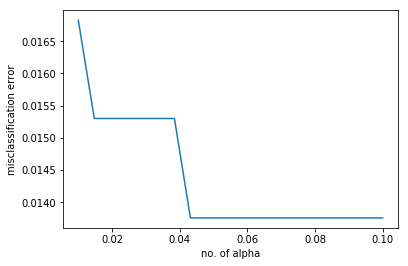

In [262]:
alpha=np.linspace(0.01,0.1,20)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    score=cross_val_score(clf,x_train,y_train,cv=8,scoring='accuracy') #Hyper paramter -CV
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('the optimal value of alpha is %0.3f' % optimal_alpha)
plt.plot(alpha,MSE)
plt.xlabel('no. of alpha')
plt.ylabel('misclassification error')
plt.show()

In [263]:
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
cof=confusion_matrix(y_test,y_pred).T
cof

98.9361702128


array([[145,   3],
       [  0, 134]], dtype=int64)

In [264]:
tp=int(cof[1:,1:])
fp=int(cof[1:,:1])
fn=int(cof[:1,1:])
pre=tp/(tp+fp)
rec=tp/(tp+fn)
fsco=(2*pre*rec)/(pre+rec)
print("precision is =",pre)
print("recall is =",rec)
print("fscore is =",fsco)

precision is = 1.0
recall is = 0.9781021897810219
fscore is = 0.988929889298893


**3) TFIDF - multinomialNB **

In [265]:
tf_idf=TfidfVectorizer()
tfidf=tf_idf.fit_transform(data['cleaned_mail_stem'].values)
x=tfidf  
y=data['type'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,shuffle=False)

the optimal value of alpha is 0.43


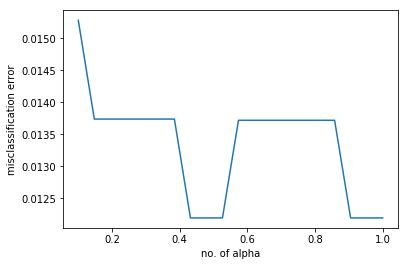

In [269]:
alpha=np.linspace(0.1,1,20)
cv_scores=[]

for a in alpha:
    clf=MultinomialNB(alpha=a)
    score=cross_val_score(clf,x_train,y_train,cv=8,scoring='accuracy')
    cv_scores.append(score.mean())
    
MSE=[1-x for x in cv_scores]

optimal_alpha=alpha[MSE.index(min(MSE))]
print('the optimal value of alpha is %0.2f' % optimal_alpha)
plt.plot(alpha,MSE)
plt.xlabel('no. of alpha')
plt.ylabel('misclassification error')
plt.show()

In [270]:
clf=MultinomialNB(alpha=optimal_alpha)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred,normalize=True)*float(100)
print(acc)
cof=confusion_matrix(y_test,y_pred).T
cof

98.5815602837


array([[142,   1],
       [  3, 136]], dtype=int64)

In [271]:
tp=int(cof[1:,1:])
fp=int(cof[1:,:1])
fn=int(cof[:1,1:])
pre=tp/(tp+fp)
rec=tp/(tp+fn)
fsco=(2*pre*rec)/(pre+rec)
print("precision is =",pre)
print("recall is =",rec)
print("fscore is =",fsco)

precision is = 0.9784172661870504
recall is = 0.9927007299270073
fscore is = 0.9855072463768116


## Result
    * Binary BOW,BOW and TFIDF gives exactly same accuracy, precision , recall and fscore.
    * overall ,Binary BOW gives the best result and is the final model.